## Exploratory Data Analysis (EDA) OF SPECTRAL REFLECTANCE DATA of corn samples

### **Dataset Overview**  
This dataset contains **spectral reflectance data** from **corn samples** obtained through **hyperspectral imaging**. The objective is to use machine learning to predict the concentration of **DON (Deoxynivalenol)**, a toxic compound, in corn.

---

### **Dataset Structure**  
- **Rows (Samples):** Each row corresponds to an individual corn sample.  
- **Columns (Features):**  
  1. **"hsi_id"** (Column 1): A unique identifier for each sample.  
  2. **448 Spectral Reflectance Features** (Columns 2 to 449):  
     - These columns hold reflectance values at different **wavelength bands**.  
     - The values range between **0.26** and **0.95**.  
  3. **"vomitoxin_ppb"** (Column 450):  
     - The target variable representing **DON concentration** in parts per billion (ppb).  
     - Values range from **0 ppb** to **131,000 ppb**.  

---

### **Understanding Spectral Reflectance Features**  
- The **448 spectral reflectance values** represent how much light is reflected from the corn samples at specific wavelengths.  
- Reflectance data helps identify chemical properties that could be linked to DON contamination.  
- Patterns in the reflectance values provide clues about the sample's quality and level of contamination.  

---

### **Target Variable: DON Concentration (`vomitoxin_ppb`)**  
- DON (Deoxynivalenol) is a **mycotoxin** produced by fungi that can contaminate corn.  
- High DON levels can pose risks to both **human and animal health**.  
- The goal is to develop a model that accurately predicts the DON concentration based on spectral data.  

1. **import Libaries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

- **Upload The dataset**

In [2]:
df=pd.read_csv("TASK-ML-INTERN.csv")

In [3]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [4]:
df.shape

(500, 450)

In [7]:
print(df.isnull())

     hsi_id      0      1      2      3      4      5      6      7      8  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
..      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
495   False  False  False  False  False  False  False  False  False  False   
496   False  False  False  False  False  False  False  False  False  False   
497   False  False  False  False  False  False  False  False  False  False   
498   False  False  False  False  False  False  False  False  False  False   
499   False  False  False  False  False  False  False  False  False  False   

     ...    439    440    441    442    443    444    445    44

# missing Value

In [8]:
## check missing value
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

- **no missing value present in our dataset**

In [9]:
## check duplicate
df.duplicated().sum()

0

- **There are no duplicate value**

In [10]:
## checking the number of unique value of each columns
df.nunique()

hsi_id           497
0                500
1                500
2                500
3                500
                ... 
444              500
445              500
446              500
447              500
vomitoxin_ppb    128
Length: 450, dtype: int64

- **Summary Statistics of the spectral data**

In [11]:
summary_stats=df.iloc[:,1:].describe()

In [12]:
summary_stats

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


- **checking outlier**

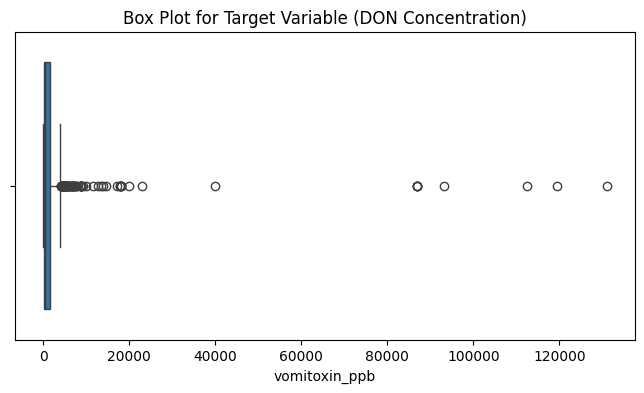

In [5]:
# Box plot to detect outliers in the target variable (vomitoxin_ppb)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['vomitoxin_ppb'])
plt.title('Box Plot for Target Variable (DON Concentration)')
plt.show()

### Box Plot Analysis
- **The box plot shows outliers as points that are far from the whiskers.**
- **There are several high-value outliers in the DON concentration**

In [3]:
# Detect outliers using the IQR method
Q1 = df['vomitoxin_ppb'].quantile(0.25)  # 25th percentile
Q3 = df['vomitoxin_ppb'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define outliers as data points outside 1.5 * IQR range
outliers = (df['vomitoxin_ppb'] < (Q1 - 1.5 * IQR)) | (df['vomitoxin_ppb'] > (Q3 + 1.5 * IQR))
outliers.sum()

80

### *IQR Method Result*
**80 outliers detected in the target variable (vomitoxin_ppb) based on the IQR method.**

- **Handling Cap/Floor Values – Set outliers to the highest/lowest non-outlier value.**

In [4]:
# Cap and floor the outliers to the IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping and flooring
df['vomitoxin_ppb'] = df['vomitoxin_ppb'].clip(lower=lower_bound, upper=upper_bound)

# Verify outliers after capping
outliers_after_capping = ((df['vomitoxin_ppb'] < lower_bound) | (df['vomitoxin_ppb'] > upper_bound)).sum()
outliers_after_capping

0

- **Apply normalization or standardization to the spectral data**

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Extract spectral features (excluding hsi_id and target variable)
X = df.iloc[:, 1:-1]

# Apply Standardization (Zero Mean, Unit Variance)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply Min-Max Normalization (Scale between 0 and 1)
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

# Convert back to DataFrame for visualization
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)

# Compute the average spectral reflectance before and after scaling
mean_original = X.mean(axis=0)
mean_standardized = df_standardized.mean(axis=0)
mean_normalized = df_normalized.mean(axis=0)

- **Plot the average spectral reflectance curves**

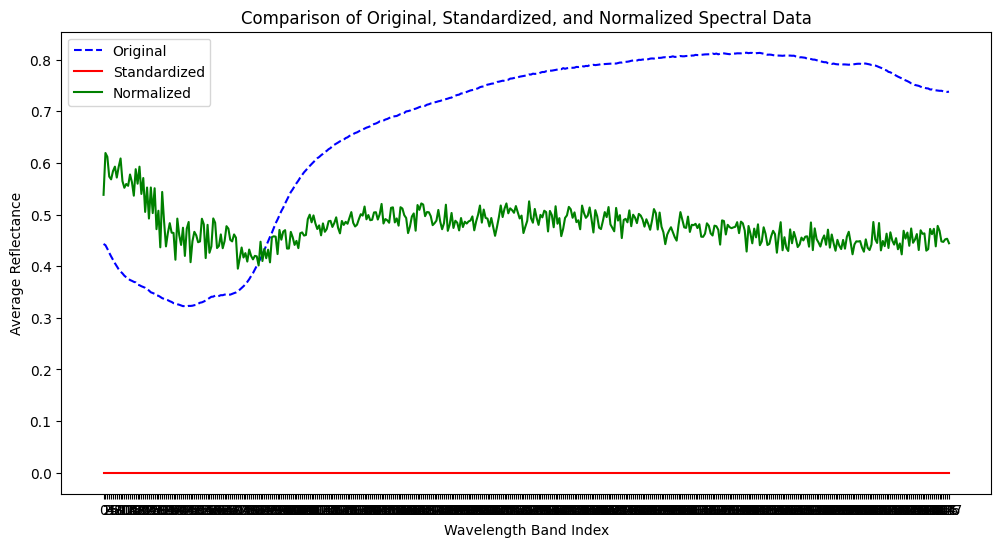

In [9]:
# Plot the average spectral reflectance curves
plt.figure(figsize=(12, 6))
plt.plot(mean_original, label="Original", color='blue', linestyle='dashed')
plt.plot(mean_standardized, label="Standardized", color='red')
plt.plot(mean_normalized, label="Normalized", color='green')
plt.xlabel("Wavelength Band Index")
plt.ylabel("Average Reflectance")
plt.title("Comparison of Original, Standardized, and Normalized Spectral Data")
plt.legend()
plt.show()

- **spectral reflectance curves for random corn samples across multiple wavelength bands.**

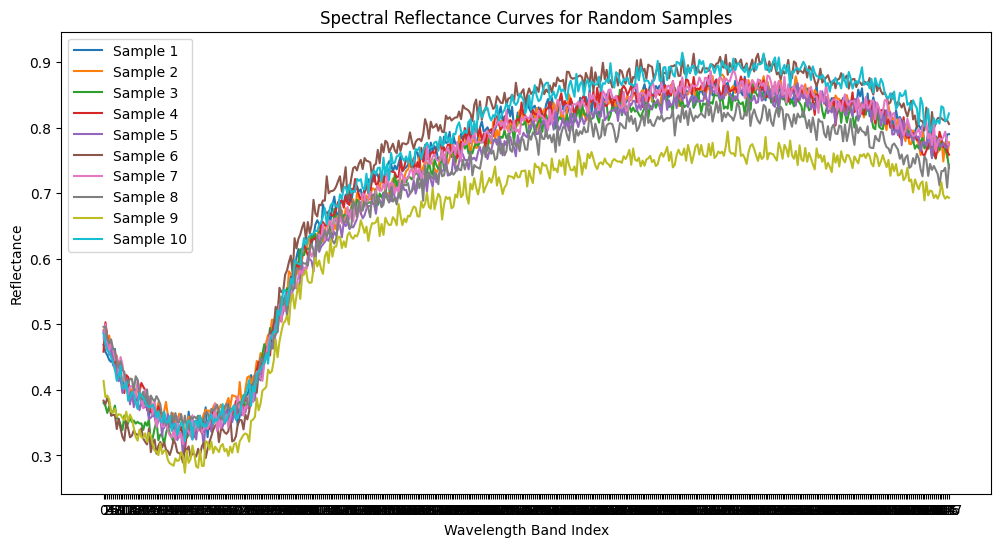

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select a random subset of samples for visualization
np.random.seed(42)
sample_indices = np.random.choice(df.index, size=10, replace=False)
subset = df.iloc[sample_indices, 1:-1].T  # Transpose for plotting

# Plot spectral reflectance curves for selected samples
plt.figure(figsize=(12, 6))
for i, sample in enumerate(subset.columns):
    plt.plot(subset.index, subset[sample], label=f'Sample {i+1}')

plt.xlabel("Wavelength Band Index")
plt.ylabel("Reflectance")
plt.title("Spectral Reflectance Curves for Random Samples")
plt.legend()
plt.show()


- **dimensionality reduction using PCA**

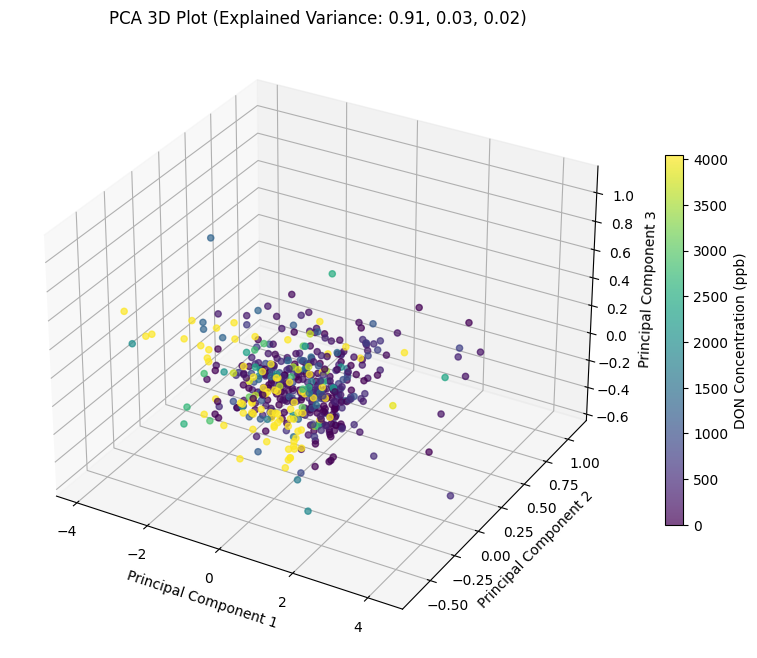

In [5]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X = df.iloc[:,1:-1]
X_pca = pca.fit_transform(X)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=df["vomitoxin_ppb"], cmap='viridis', alpha=0.7)

# Add color bar
colorbar = fig.colorbar(scatter, ax=ax, shrink=0.6)
colorbar.set_label("DON Concentration (ppb)")

# Set labels and title
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title(f"PCA 3D Plot (Explained Variance: {explained_variance[0]:.2f}, {explained_variance[1]:.2f}, {explained_variance[2]:.2f})")

# Show the plot
plt.show()


- **Training and Testing our dataset**

In [11]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.iloc[:,1:-1]
y = df["vomitoxin_ppb"]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((400, 448), (100, 448), (400,), (100,))

- ## **creating a model by using Randomforest Regressor Algorithm** 

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}
MAE: 808.48, RMSE: 1059.98, R²: 0.43


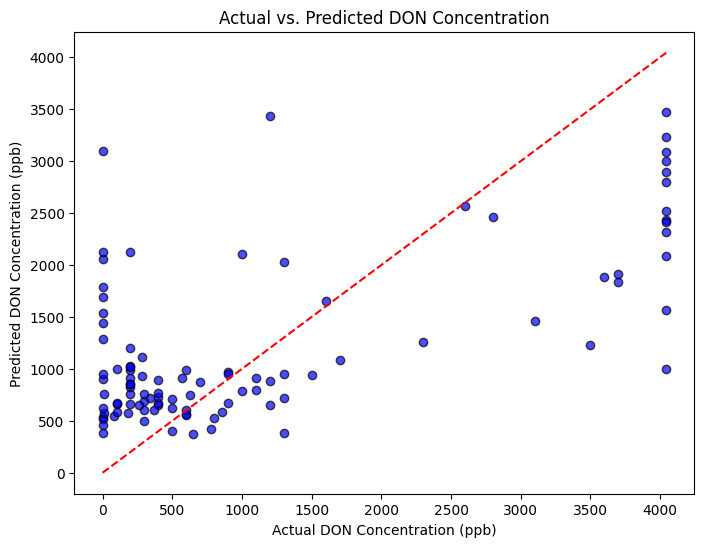

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform Random Search with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=10, cv=5, n_jobs=-1, scoring='neg_mean_squared_error',
                                   random_state=42)
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train the model with best parameters
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# ===============================
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

# ===============================
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue", edgecolors="k")
plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--", color="red")  # Ideal prediction line
plt.xlabel("Actual DON Concentration (ppb)")
plt.ylabel("Predicted DON Concentration (ppb)")
plt.title("Actual vs. Predicted DON Concentration")
plt.show()


- ## **creating a model by using CNN**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'learning_rate': 0.01, 'kernel_size': 5, 'filters2': 128, 'filters1': 16, 'epochs': 150, 'dropout_rate': 0.2, 'dense_units': 32, 'batch_size': 32, 'activation': 'relu'}
MAE: 3536.34, RMSE: 12842.01, R²: 0.41, Loss: 164917248.00


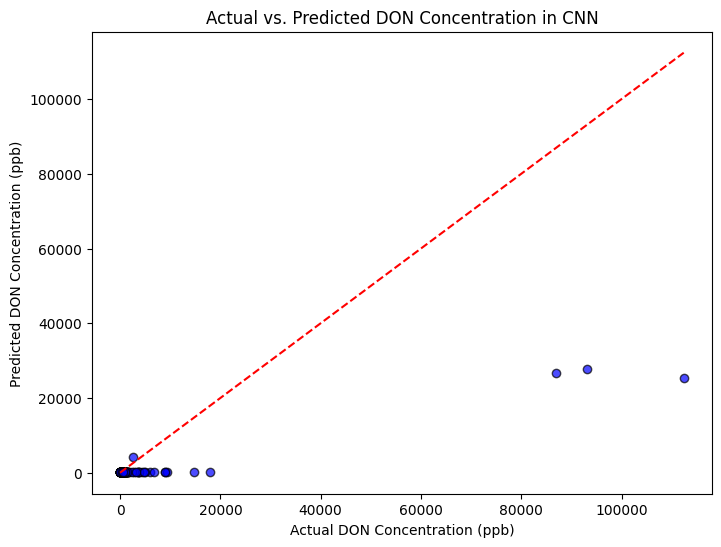

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
class CNNModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.best_model = None
        self.best_params = None

    def build_model(self, filters1=32, filters2=64, kernel_size=3, activation='relu', 
                    dropout_rate=0.3, learning_rate=0.001, dense_units=64):
        model = Sequential()
        model.add(Conv1D(filters=filters1, kernel_size=kernel_size, activation=activation, 
                         input_shape=self.input_shape))
        model.add(MaxPooling1D(pool_size=2))  
        model.add(Conv1D(filters=filters2, kernel_size=kernel_size, activation=activation))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(dense_units, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(int(dense_units / 2), activation=activation))
        model.add(Dense(1))  # Output layer for regression
        
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        return model

    def train_with_tuning(self, X_train, y_train):
        model = KerasRegressor(build_fn=self.build_model, verbose=0)

        param_dist = {
            'filters1': [16, 32, 64],
            'filters2': [32, 64, 128],
            'kernel_size': [3, 5],  # Conv1D kernel size is a single integer
            'activation': ['relu', 'tanh'],
            'dropout_rate': [0.2, 0.3, 0.4],
            'learning_rate': [0.01, 0.001, 0.0001],
            'dense_units': [32, 64, 128],
            'batch_size': [16, 32, 64],
            'epochs': [50, 100, 150] 
        }

        # Perform Random Search with cross-validation
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=3, verbose=1, n_jobs=-1)
        
        random_search.fit(X_train, y_train)
        self.best_model = random_search.best_estimator_
        self.best_params = random_search.best_params_
        print("Best Hyperparameters:", self.best_params)

    def predict(self, X_test):
        return self.best_model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        self.pred_y = y_pred
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        loss = self.best_model.model.evaluate(X_test, y_test, verbose=0)
        return mae, rmse, r2, loss

    def Scater_plot(self, y_test):
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, self.pred_y, alpha=0.7, color="blue", edgecolors="k")
        plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--", color="red")  # Ideal prediction line
        plt.xlabel("Actual DON Concentration (ppb)")
        plt.ylabel("Predicted DON Concentration (ppb)")
        plt.title("Actual vs. Predicted DON Concentration in CNN")
        plt.show()

# ===============================
# Load and reshape data for CNN

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values  # Target variable (DON concentration)
X = X.reshape(X.shape[0],28,16)  # Reshape to (samples, features, channels)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train CNN model with tuning
cnn = CNNModel(input_shape=(28,16))
cnn.train_with_tuning(X_train, y_train)

# Evaluate model performance
mae, rmse, r2, loss = cnn.evaluate(X_test, y_test)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Loss: {loss:.2f}")

# Scatter plot
cnn.Scater_plot(y_test)

- ## **creating a model by using FCNN**

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'neurons': 64, 'learning_rate': 0.01, 'layers': 9, 'epochs': 150, 'dropout_rate': 0.2, 'batch_size': 32, 'activation': 'relu'}
MAE: 718.91, RMSE: 1033.51, R²: 0.46, Loss: 1068139.25


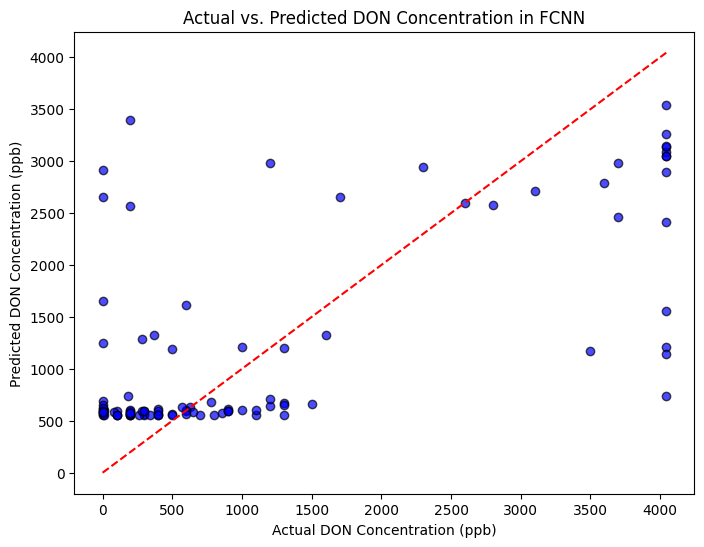

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
class FCNNModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build_model(self, layers=2, neurons=128, activation='relu', dropout_rate=0.3, learning_rate=0.001):
        model = Sequential()
        model.add(Dense(neurons, activation=activation, input_shape=(self.input_shape,)))
        for _ in range(layers - 1):
            model.add(Dense(neurons, activation=activation))
            model.add(Dropout(dropout_rate))
        model.add(Dense(1))  # Output layer for regression
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        return model

    def train_with_tuning(self, X_train, y_train):
        model = KerasRegressor(build_fn=self.build_model, verbose=0)

        param_dist = {
            'layers': [5,7,9],
            'neurons': [64, 128, 256],
            'activation': ['relu', 'tanh', 'sigmoid'],
            'dropout_rate': [0.2, 0.3, 0.5],
            'learning_rate': [0.01, 0.001, 0.0001],
            'batch_size': [16, 32, 64],
            'epochs': [50, 100, 150] 
        }

        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=3, verbose=1, n_jobs=-1)

        random_search.fit(X_train, y_train)
        self.best_model = random_search.best_estimator_
        self.best_params = random_search.best_params_
        return self.best_params

    def predict(self, X_test):
        return self.best_model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        self.pred_y = y_pred
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        loss = self.best_model.model.evaluate(X_test, y_test, verbose=0)
        return mae, rmse, r2, loss
    def Scater_plot(self,y_test):
            
    # Scatter plot of actual vs predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test,self.pred_y, alpha=0.7, color="blue", edgecolors="k")
        plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--", color="red")  # Ideal prediction line
        plt.xlabel("Actual DON Concentration (ppb)")
        plt.ylabel("Predicted DON Concentration (ppb)")
        plt.title("Actual vs. Predicted DON Concentration in FCNN")
        plt.show()

# Example usage

# Example usage
# Define features and target variable
X = df.iloc[:, 1:-1]
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
y = df["vomitoxin_ppb"]

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape
fcnn = FCNNModel(input_shape=X_train.shape[1])
best_params = fcnn.train_with_tuning(X_train, y_train)
print("Best Hyperparameters:", best_params)

mae, rmse, r2, loss = fcnn.evaluate(X_test, y_test)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}, Loss: {loss:.2f}")
fcnn.Scater_plot(y_test)

- ## **creating a model by using LSTM**

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Class for LSTM Model
class LSTMModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.best_model = None
        self.best_params = None

    #  Method to build the LSTM model
    def build_model(self, units=50, activation='tanh', dropout_rate=0.2, learning_rate=0.001):
        model = Sequential()
        model.add(LSTM(units=units, activation=activation, input_shape=self.input_shape, return_sequences=True))
        model.add(Dropout(dropout_rate))
        model.add(LSTM(units=units // 2, activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1))  # Output layer for regression
        
        # Compile the model
        model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
        return model
    
    #  Method to train the model with hyperparameter tuning using Random Search
    def train_with_tuning(self, X_train, y_train):
        model = KerasRegressor(build_fn=self.build_model, verbose=0)

        # Define hyperparameter search space
        param_dist = {
            'units': [32, 64, 128],
            'activation': ['tanh', 'relu'],
            'dropout_rate': [0.2, 0.3, 0.4],
            'learning_rate': [0.001, 0.0001, 0.01],
            'batch_size': [16, 32, 64],
            'epochs': [50, 100, 150] 
        }

        # Use RandomizedSearchCV for tuning
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                           n_iter=10, cv=3, verbose=1, n_jobs=-1)
        random_search.fit(X_train, y_train)

        # Save the best model and hyperparameters
        self.best_model = random_search.best_estimator_
        self.best_params = random_search.best_params_
        print("\nBest Parameters:", self.best_params)

    #  Method to predict on test set
    def predict(self, X_test):
        return self.best_model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        self.pred_y = y_pred
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        loss = self.best_model.model.evaluate(X_test, y_test, verbose=0)
        return mae, rmse, r2, loss
    def Scater_plot(self,y_test):
                
    # Scatter plot of actual vs predicted values
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test,self.pred_y, alpha=0.7, color="blue", edgecolors="k")
        plt.plot([0, max(y_test)], [0, max(y_test)], linestyle="--", color="red")  # Ideal prediction line
        plt.xlabel("Actual DON Concentration (ppb)")
        plt.ylabel("Predicted DON Concentration (ppb)")
        plt.title("Actual vs. Predicted DON Concentration in CNN")
        plt.show()



Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best Parameters: {'units': 128, 'learning_rate': 0.01, 'epochs': 150, 'dropout_rate': 0.3, 'batch_size': 64, 'activation': 'relu'}

Model Performance:
MAE: 753.0047
RMSE: 1069.4521
R² Score: 0.4174
Loss: 1143727.7500


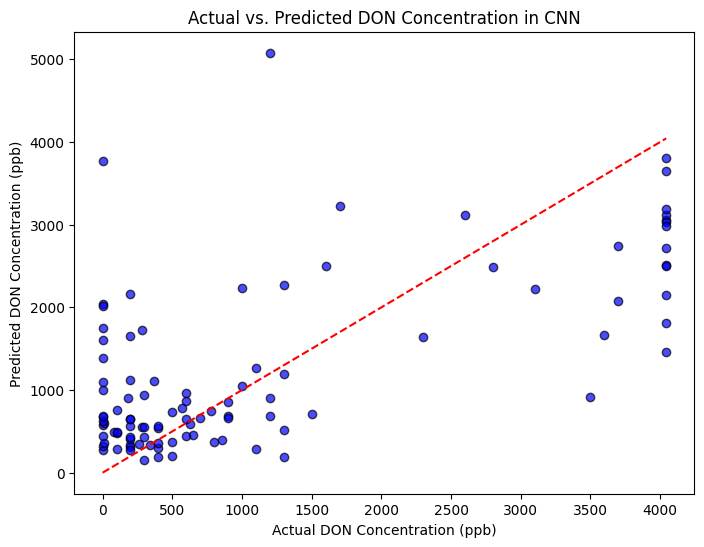

In [21]:
# Extract spectral features and target variable
x_pca = pd.DataFrame(X_pca , columns=['pc1','pc2','pc3'])
X = x_pca.values  # Spectral data (3 bands)
y = df['vomitoxin_ppb']    # Target variable (DON concentration)

# Reshape data for LSTM input (samples, time_steps, features)
X = X.reshape(X.shape[0], 1,3)  # Example: reshape 3 bands into (1,3)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LSTM model with hyperparameter tuning
lstm = LSTMModel(input_shape=(X_train.shape[1], X_train.shape[2]))
lstm.train_with_tuning(X_train, y_train)

# Evaluate model performance
mae, rmse, r2, loss = lstm.evaluate(X_test, y_test)

print(f"\nModel Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Loss: {loss:.4f}")
lstm.Scater_plot(y_test)